<a href="https://colab.research.google.com/github/danaSror/analyze-the-activities-of-party/blob/main/Analyze_the_activities_of_party.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🌟 **Analyze the activities of party**  🌟
---


◽ It is necessary to switch to a **GPU** in order to shorten the running times

◽ After completing the installation step the notebook should be restart


# Installation

In [ ]:
!pip install afinn
!pip install turicreate
!pip install wordcloud
!pip install imageio
!pip install plotly_express
!pip install pyyaml==5.4.1
!pip install summarizers -q
!pip3 install snscrape
!pip install bertopic
!pip install GoogleNews
!pip install python-bidi
!pip install geopy
!pip install geopandas
!pip install imageio
!pip3 install imageai --upgrade

import nltk
nltk.download('punkt')
nltk.download('stopwords')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-2.0.4-cp37-cp37m-manylinux2010_x86_64.whl (86.4 MB)
  Using cached numpy-1.18.5-cp37-cp37m-manylinux1_x86_64.whl (20.1 MB)
  Using cached tensorboard-2.0.2-py3-none-any.whl (3.8 MB)
  Using cached tensorflow_estimator-2.0.1-py2.py3-none-any.whl (449 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached numba-0.55.2-cp37-cp37m-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Using cached numba-0.55.1-1-cp37-cp37m-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Using cached numba-0.55.0-1-cp37-cp37m-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Using cached numba-

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.19.3-cp37-cp37m-manylinux2010_x86_64.whl (14.9 MB)
  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully u

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Analyzation**


---
I choose the **Likud** party and Member of the Knesset **Benjamin Netanyahu**.

The goal is to analyze the activities of the party and the Knesset member over the past year through social networks or articles.
But despite the attempts, the results seemed less satisfactory because of the "dirty" information structure of tweets. In addition, the tweets are in the Hebrew language and there are not enough models that are well trained in the Hebrew language.
After this attempt, I extracted news correspondence information using the Google API but got minimal information in terms of dates because it is a limited API.
But at the same time, the results seemed satisfactory and logical.

---
**My solution to the problem described is:**

***First attempt:***

1️⃣ Download tweets from Twitter for the last month (API is restricted and does not return results for older dates)

2️⃣ Identify issues using a BertTopic model

3️⃣ Visual presentation in different ways of the identified topics
After realizing that the results were less quality, I switched to the following experiment:

***Second attempt:***

1️⃣ Download articles from Google (limited in the number of repeated results)

2️⃣ Create an orderly DF of the returned results concerning the dates of the articles.

3️⃣ Training the information from the articles using BertTopic model for identifying topics

4️⃣ Present the events identified from the articles visually.

---


I will now present a prototype for solving the problem I presented in the previous section:


## Part 1 - 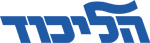



---
Data analysis for the elected party - Likud


### First approach - topic detection in Twitter using BertTopic

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from tqdm import tqdm

# Creating list to append tweet data to
tweets_list3 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in tqdm(enumerate(sntwitter.TwitterSearchScraper('הליכוד since:2022-03-01 until:2022-07-06').get_items())):
    if i>25000:
        break
    tweets_list3.append([tweet.date, tweet.id, tweet.content])

# Creating a dataframe from the tweets list above
tweets_df3 = pd.DataFrame(tweets_list3, columns=['Datetime', 'Tweet Id', 'Text'])

25001it [06:46, 61.57it/s]


In [ ]:
tweets_df3 = tweets_df3.sort_values(by=['Datetime'])
tweets_df3

,Datetime,Tweet Id,Text
25000,2022-06-22 01:42:52+00:00,1539423644996231168,@GalitDistel גליייייית \nאיזו תספורת מדהימה !\...
24999,2022-06-22 01:52:11+00:00,1539425989960290304,@Ronen2022 @immediateres ברור בכל מקום אתה שומ...
24998,2022-06-22 02:04:15+00:00,1539429026657443840,@TamerAm48431889 הליכוד מקבל 36 ו
24997,2022-06-22 02:07:15+00:00,1539429779719462912,@habibistit @shlomo_karhi רונית א. סניפי הליכו...
24996,2022-06-22 02:09:44+00:00,1539430406860193792,@habibistit @shlomo_karhi בזמן אמת הוא נכח שם ...
...,...,...,...
4,2022-07-05 23:28:26+00:00,1544463241568567296,@Nissim_Sofer כן ולא\n\nא. למפאי היתה תחושת אד...
3,2022-07-05 23:28:51+00:00,1544463346740625409,@abramovich_adi @bardugojacob יעקב ברדוגו תומך...
2,2022-07-05 23:39:37+00:00,1544466056948977664,@HottieBottie12 כולם יודעים למי מגיע הכבוד ! ה...
1,2022-07-05 23:49:23+00:00,1544468513665974274,הליכוד עןמד ל9תוח מסע הבחירות בחוף בת ים במןפע...


In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(language="multilingual",top_n_words=20, calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(tweets_df3['Text'])

Downloading:   0%|          | 0.00/968 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.79k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/645 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/471M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/782 [00:00<?, ?it/s]

2022-07-07 08:46:05,123 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2022-07-07 08:46:51,374 - BERTopic - Reduced dimensionality
2022-07-07 08:47:30,175 - BERTopic - Clustered reduced embeddings


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,11241,-1_הליכוד_את_לא_של
1,0,1812,0_הליכוד_לא_את_של
2,1,1498,1_של_הליכוד_לא_את
3,2,999,2_הליכוד_לא_של_את
4,3,751,3_הליכוד_של_את_על
...,...,...,...
152,151,10,151_מוצר_כתף_1ליולי_ולטווח
153,152,10,152_הברית_בארצות_בדק_קבע
154,153,10,153_אופציה_מגיבים_מבינים_תקיפים
155,154,10,154_אליך_מרשימת_תקרא_שב


In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=50)

In [ ]:
topic_model.visualize_distribution(probs[200], min_probability=0.015)

In [ ]:
topic_model.visualize_barchart(top_n_topics=25)

In [ ]:
topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

In [ ]:
import re

tweets_df4 = tweets_df3
tweets_df4.Text = tweets_df4.apply(lambda row: re.sub(r"http\S+", "", row.Text), 1)
tweets_df4.Text = tweets_df4.apply(lambda row: " ".join(filter(lambda x:x[0]!="@", row.Text.split())), 1)
timestamps = tweets_df4.Datetime.to_list()
tweets = tweets_df4.Text.to_list()

In [ ]:
topics2, probs2 = topic_model.fit_transform(tweets)

Batches:   0%|          | 0/782 [00:00<?, ?it/s]

2022-07-07 09:11:47,305 - BERTopic - Transformed documents to Embeddings
2022-07-07 09:12:16,700 - BERTopic - Reduced dimensionality
2022-07-07 09:13:01,310 - BERTopic - Clustered reduced embeddings


In [ ]:
topics_over_time = topic_model.topics_over_time(tweets, topics2, timestamps, nr_bins=20)

20it [00:11,  1.78it/s]


In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=26)

In [ ]:
topic_model.get_topics()

{-1: [('הליכוד', 0.005991695307877908),
  ('לא', 0.005827483839156342),
  ('את', 0.00559871708589305),
  ('של', 0.0055849134620451065),
  ('זה', 0.00528289654929349),
  ('על', 0.0051807157417286575),
  ('מה', 0.004692971290270943),
  ('עם', 0.004659888547639648),
  ('הוא', 0.004482539202086854),
  ('כל', 0.004385196748591204),
  ('אתה', 0.004348854113280528),
  ('אם', 0.004232679683289156),
  ('אני', 0.004165119808331743),
  ('ביבי', 0.004059667214976004),
  ('רק', 0.00402689994609893),
  ('אבל', 0.004000815839154045),
  ('הם', 0.003999420999230318),
  ('יש', 0.003949012175494468),
  ('גם', 0.003945876000613609),
  ('מי', 0.0037725786341564612)],
 0: [('נתניהו', 0.030370955656230176),
  ('בראשות', 0.0065577177931668605),
  ('לא', 0.005994006807031755),
  ('את', 0.005844108985844581),
  ('על', 0.005825592751183198),
  ('הוא', 0.005757690158503111),
  ('של', 0.005590778340185141),
  ('עם', 0.005554288278938349),
  ('זה', 0.005071929714671566),
  ('הליכוד', 0.0049915639757342955),
  ('כל'

In [ ]:
!mkdir ./models
topic_model.save("./models/bertTopic_model")

mkdir: cannot create directory ‘./models’: File exists


### Seconde approach - scraping news and their analysis

In [ ]:
from GoogleNews import GoogleNews

# The date range is limited to one month because this API is very restrictive
googlenews1 = GoogleNews(lang='he',start='01/06/2022',end='07/07/2022')
googlenews1.get_news('הליכוד')
likud_result = googlenews1.results()

In [ ]:
from dataclasses import dataclass
import pandas as pd
month_name_list =["בדצמ׳",'בינו׳','בפבר׳','במרץ','באפר׳','במאי','ביוני','באוק׳','בנוב׳']
month_num_list = [12,1,2,3,4,5,6,10,11]

dates = {month_name_list[i]: month_num_list[i] for i in range(len(month_name_list))}
events_date = []
events_text = []

for res in likud_result:
  event =res['title']
  date = res['date']
  if date:
    date_lst = date.split()
    if len(date_lst) == 2:
      new_date = f"2022-{dates[date_lst[1]]}-{date_lst[0]}"
    elif len(date_lst) == 3:
      new_date = f"2021-{dates[date_lst[1]]}-{date_lst[0]}"
  if date:
    events_date.append(new_date)
    events_text.append(event)

event_df2 = pd.DataFrame(list(zip(events_date, events_text)),columns =['Date', 'Event'])
event_df2 = event_df2.sort_values(by=['Date'])
event_df2

,Date,Event
59,2021-10-12,סקר מנדטים: כמה יולי אדלשטיין היה מקבל בראשות ...
73,2021-10-22,אחרי הצהרת אדלשטיין: סקר פנימי חשף מי המועמדים...
71,2021-11-1,"סקר מנדטים: הליכוד מתחזקת, העבודה נוסקת ומפלגה..."
83,2021-11-16,"בכיר בליכוד בהתבטאות מפתיעה: ""מוכנים שגנץ יהיה..."
89,2021-11-17,"רונן צור, יועצו לשעבר של בני גנץ עולה להתקפה נ..."
...,...,...
31,2022-6-4,סילמן לא היחידה: אלו חברי הכנסת מהקואליציה שעל...
14,2022-6-4,מאחורי הקלעים של המגעים בין גדעון סער לליכוד ו...
79,2022-6-4,אופירה וברקו: ניר ברקת הציג איך שומרים על נתני...
21,2022-6-5,אריה אלדד: הליכוד צריך לנצל את ההזדמנות הטמונה...


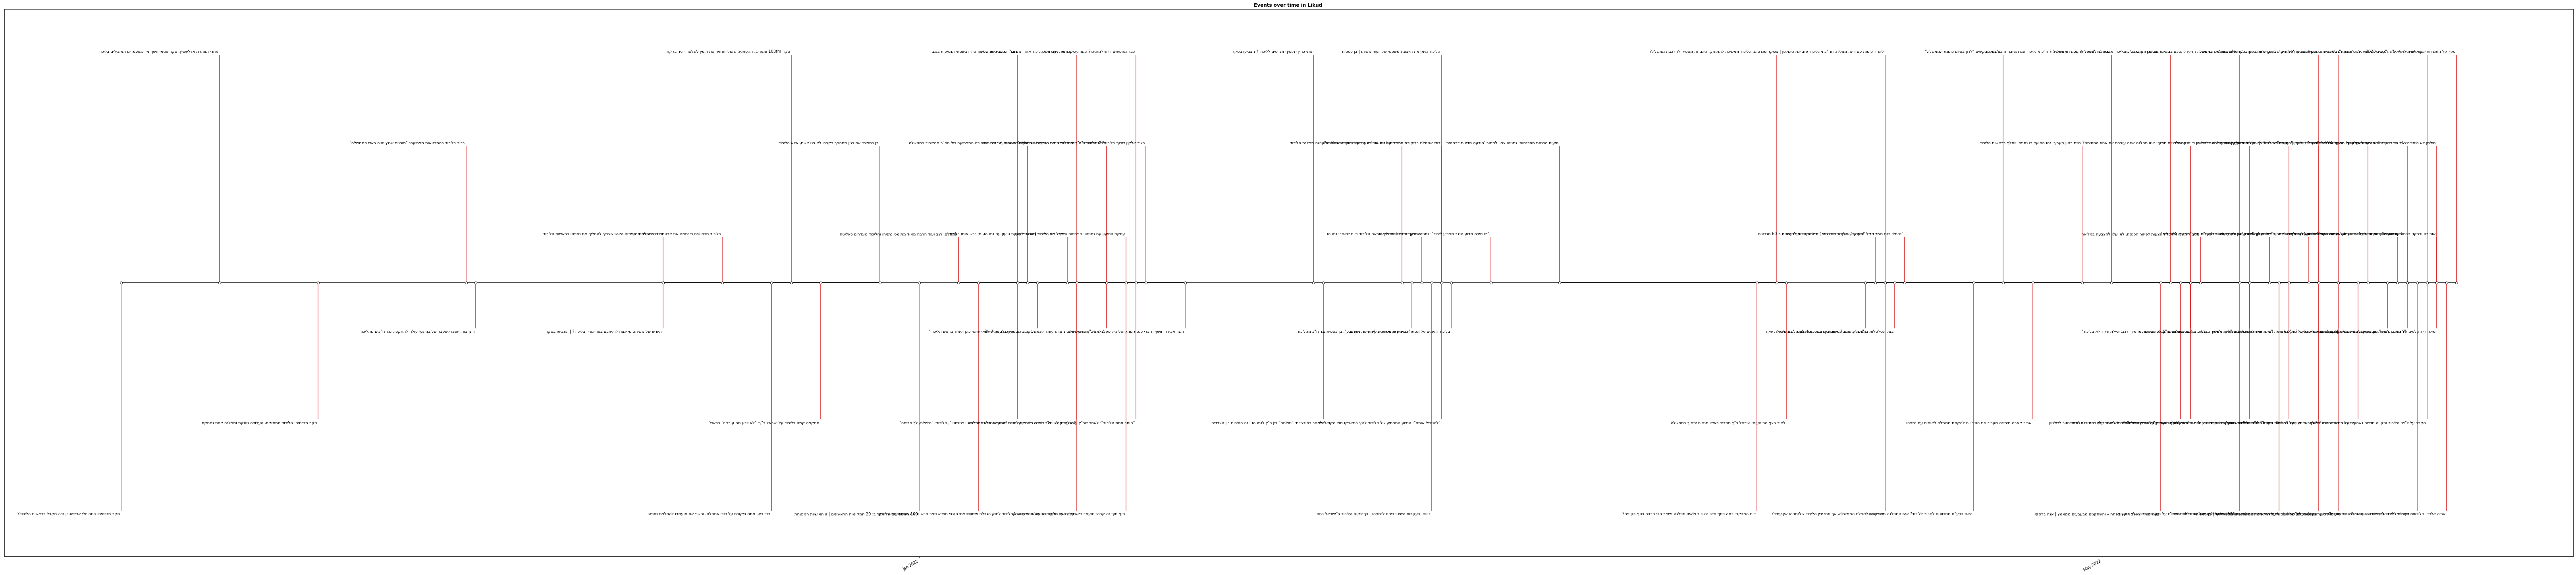

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
from bidi.algorithm import get_display

names = list(event_df2['Event'])
new_names = []
for name in names:
  new_names.append(get_display(name))

dates = list(event_df2['Date'])

# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(90, 20), constrained_layout=True)
ax.set()
ax.set_title("Events over time in Likud ", fontweight ="bold",loc='center')

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, new_names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)

ax.margins(y=0.1)
plt.show()

Now lets visualize with BerTopic over time

In [ ]:
from bertopic import BERTopic

articals_topic_model = BERTopic(language="multilingual",top_n_words=20, calculate_probabilities=True, verbose=True)
artical_topics, bibi_probs = articals_topic_model.fit_transform(event_df2['Event'])

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

2022-07-07 14:39:28,595 - BERTopic - Transformed documents to Embeddings
2022-07-07 14:39:31,311 - BERTopic - Reduced dimensionality
2022-07-07 14:39:31,327 - BERTopic - Clustered reduced embeddings


In [ ]:
import re

articals_df = event_df2
articals_df.Event = articals_df.apply(lambda row: re.sub(r"http\S+", "", row.Event), 1)
articals_df.Event = articals_df.apply(lambda row: " ".join(filter(lambda x:x[0]!="@", row.Event.split())), 1)
timestamps = articals_df.Date.to_list()
tweets = articals_df.Event.to_list()

In [ ]:
artical_topics2, bibi_probs2 = articals_topic_model.fit_transform(tweets)

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

2022-07-07 14:41:38,402 - BERTopic - Transformed documents to Embeddings
2022-07-07 14:41:41,595 - BERTopic - Reduced dimensionality
2022-07-07 14:41:41,617 - BERTopic - Clustered reduced embeddings


In [ ]:
artical_topics_over_time = articals_topic_model.topics_over_time(tweets, artical_topics2, timestamps, nr_bins=20)

19it [00:00, 138.78it/s]


In [ ]:
articals_topic_model.visualize_topics_over_time(artical_topics_over_time, top_n_topics=26)

## Part 2 - 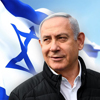
---

Data analysis for the elected Knesset member - Benjamin Netanyahu

### First approach - topic detection in Twitter using BertTopic

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from tqdm import tqdm

# Creating list to append tweet data to
bibi_tweets_list = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in tqdm(enumerate(sntwitter.TwitterSearchScraper('ביבי נתניהו since:2022-03-01 until:2022-07-06').get_items())):
    if i>25000:
        break
    bibi_tweets_list.append([tweet.date, tweet.id, tweet.content])

# Creating a dataframe from the tweets list above
bibi_tweets_df = pd.DataFrame(bibi_tweets_list, columns=['Datetime', 'Tweet Id', 'Text'])
bibi_tweets_df = bibi_tweets_df.sort_values(by=['Datetime'])
bibi_tweets_df

14208it [04:39, 50.91it/s]


,Datetime,Tweet Id,Text
14207,2022-03-01 03:13:20+00:00,1498496580181233669,@netanelgla ביבי נתניהו היה המחסום האחרון לביז...
14206,2022-03-01 03:38:08+00:00,1498502824044511235,"@regev_miri אחלה של גיבוי, רק שני פרטים ששכחת:..."
14205,2022-03-01 04:30:43+00:00,1498516057631375362,@netanyahu מקבלים חלחלה רק לחשוב מה היה קורה א...
14204,2022-03-01 05:11:58+00:00,1498526437879554049,בוקר טוב לעיתונאי הכי ותיק בארץ.והכי אמין במדי...
14203,2022-03-01 05:12:27+00:00,1498526559669522435,"@Ahuva1MirnzpJ ולכן כל מה שקשור ב-""ביבי"" עובר ..."
...,...,...,...
4,2022-07-05 22:08:36+00:00,1544443154077818882,#ביבי_מלך_ישראל_חי_וקיים #שרה_נתניהו_האישה_הכי...
3,2022-07-05 22:09:26+00:00,1544443361058205697,"@BenCaspit בן יקר.\nבינינו, הרי מה שמר נתניהו ..."
2,2022-07-05 22:50:08+00:00,1544453602923651073,@hasolidit @netanyahu אני תומך בנתניהו ומסכים ...
1,2022-07-05 22:53:42+00:00,1544454502669058048,@maltshul @yairlapid @steinitz_yuval אתה מתכוו...


In [ ]:
from bertopic import BERTopic

bibi_topic_model = BERTopic(language="multilingual",top_n_words=20, calculate_probabilities=True, verbose=True)
bibi_topics, bibi_probs = bibi_topic_model.fit_transform(bibi_tweets_df['Text'])

Batches:   0%|          | 0/444 [00:00<?, ?it/s]

2022-07-07 09:39:20,980 - BERTopic - Transformed documents to Embeddings
2022-07-07 09:39:38,411 - BERTopic - Reduced dimensionality
2022-07-07 09:39:51,059 - BERTopic - Clustered reduced embeddings


In [ ]:
bibi_topic_model.get_topic_info()

,Topic,Count,Name
0,-1,8652,-1_ביבי_נתניהו_את_לא
1,0,486,0_את_ביבי_לא_נתניהו
2,1,427,1_לא_נתניהו_ביבי_של
3,2,299,2_לא_נתניהו_ביבי_של
4,3,258,3_ביבי_נתניהו_לא_את
...,...,...,...
127,126,10,126_מממש_חליפי_בחינם_האג
128,127,10,127_עשה_ואפילו_arierabinovitch_במכנה
129,128,10,128_shoot_תומכי_לשעבר_טרור
130,129,10,129_משקר_בחרתי_בגץ_יפרוש


In [ ]:
bibi_topic_model.visualize_topics()


In [ ]:
bibi_topic_model.visualize_hierarchy(top_n_topics=50)

In [ ]:
bibi_topic_model.visualize_distribution(probs[200], min_probability=0.015)

In [ ]:
bibi_topic_model.visualize_barchart(top_n_topics=25)

In [ ]:
bibi_topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

In [ ]:
import re

bibi_tweets2 = bibi_tweets_df
bibi_tweets2.Text = bibi_tweets2.apply(lambda row: re.sub(r"http\S+", "", row.Text), 1)
bibi_tweets2.Text = bibi_tweets2.apply(lambda row: " ".join(filter(lambda x:x[0]!="@", row.Text.split())), 1)
timestamps = bibi_tweets2.Datetime.to_list()
tweets = bibi_tweets2.Text.to_list()

In [ ]:
bibi_topics2, bibi_probs2 = bibi_topic_model.fit_transform(tweets)

Batches:   0%|          | 0/444 [00:00<?, ?it/s]

2022-07-07 09:51:36,455 - BERTopic - Transformed documents to Embeddings
2022-07-07 09:52:00,378 - BERTopic - Reduced dimensionality
2022-07-07 09:52:13,957 - BERTopic - Clustered reduced embeddings


In [ ]:
bibi_topics_over_time = bibi_topic_model.topics_over_time(tweets, bibi_topics2, timestamps, nr_bins=20)

20it [00:06,  2.91it/s]


In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=26)

### Seconde approach - scraping news and their analysis

In [ ]:
from GoogleNews import GoogleNews

# The date range is limited to one month because this API is very restrictive
googlenews1 = GoogleNews(lang='he',start='01/06/2022',end='07/07/2022')
googlenews1.get_news('ביבי נתניהו')
bibi_result = googlenews1.results()

In [ ]:
from dataclasses import dataclass
import pandas as pd
month_name_list =["בדצמ׳",'בינו׳','בפבר׳','במרץ','באפר׳','במאי','ביוני','באוק׳','בנוב׳']
month_num_list = [12,1,2,3,4,5,6,10,11]

dates = {month_name_list[i]: month_num_list[i] for i in range(len(month_name_list))}
bibi_events_date = []
bibi_events_text = []

for res in bibi_result:
  try:
    event =res['title']
    date = res['date']
    if date:
      date_lst = date.split()
      if len(date_lst) == 2:
        new_date = f"2022-{dates[date_lst[1]]}-{date_lst[0]}"
      elif len(date_lst) == 3:
        new_date = f"2021-{dates[date_lst[1]]}-{date_lst[0]}"
    if date:
      bibi_events_date.append(new_date)
      bibi_events_text.append(event)
  except:
    pass

bibi_event_df2 = pd.DataFrame(list(zip(bibi_events_date, bibi_events_text)),columns =['Date', 'Event'])
bibi_event_df2 = bibi_event_df2.sort_values(by=['Date'])
bibi_event_df2

,Date,Event
39,2022-6-10,"דבר מחזיונותיו של נתניהו לגבי הממשלה לא התגשם,..."
40,2022-6-10,"מקורבי נתניהו: ""עדות קליין רצופה שקרים בוטים ו..."
50,2022-6-11,"לפיד תקף פוסט של נתניהו: ""לצבוט את עצמך כדי לה..."
29,2022-6-12,"""תתבייש ותתנצל"" | פוסט של נתניהו חרך את הרשת"
49,2022-6-12,האם נתניהו הנחה את פילבר? שמונה נקודות לפיצוח ...
48,2022-6-12,"בנט הצליח להפוך לראש ממשלת הרק לא ביבי, אבל לא..."
28,2022-6-12,"ראש המל""ל לשעבר מעיד: ""נתניהו לא התכונן לפגישה..."
17,2022-6-13,"בנט: ""הורדנו את האבטלה ואת הגירעון""; נתניהו: ""..."
44,2022-6-13,"נתניהו עוקץ: ""זאת אחת הלוויות הארוכות בהיסטוריה"""
45,2022-6-13,"לוינסון תוקף: ""נתניהו לא נהנתן, הוא קמצן חולני"""


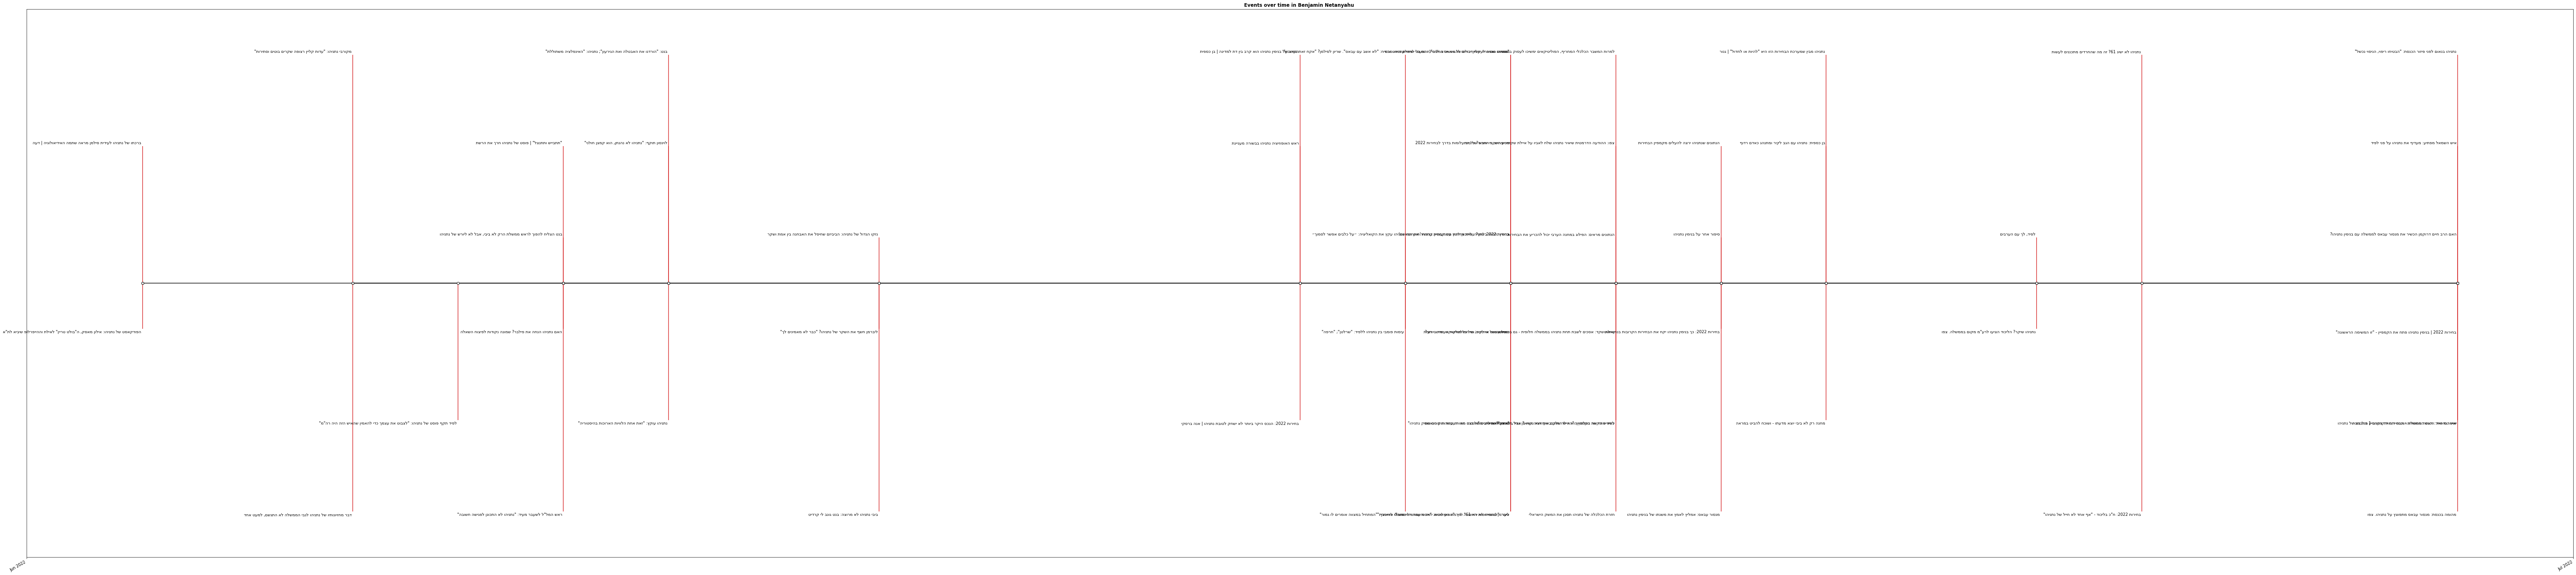

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
from bidi.algorithm import get_display

names = list(bibi_event_df2['Event'])
new_names = []
for name in names:
  new_names.append(get_display(name))

dates = list(bibi_event_df2['Date'])

# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(90, 20), constrained_layout=True)
ax.set()
ax.set_title("Events over time in Benjamin Netanyahu ", fontweight ="bold",loc='center')

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, new_names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)

ax.margins(y=0.1)
plt.show()

Now lets visualize with BerTopic over time

In [ ]:
from bertopic import BERTopic

bibi_articals_topic_model = BERTopic(language="multilingual",top_n_words=20, calculate_probabilities=True, verbose=True)
bibi_artical_topics, bibi_probs = bibi_articals_topic_model.fit_transform(bibi_event_df2['Event'])

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

2022-07-07 15:07:21,774 - BERTopic - Transformed documents to Embeddings
2022-07-07 15:07:24,543 - BERTopic - Reduced dimensionality
2022-07-07 15:07:24,558 - BERTopic - Clustered reduced embeddings


In [ ]:
import re

bibi_articals_df = bibi_event_df2
bibi_articals_df.Event = bibi_articals_df.apply(lambda row: re.sub(r"http\S+", "", row.Event), 1)
bibi_articals_df.Event = bibi_articals_df.apply(lambda row: " ".join(filter(lambda x:x[0]!="@", row.Event.split())), 1)
timestamps = bibi_articals_df.Date.to_list()
tweets = bibi_articals_df.Event.to_list()

In [ ]:
bibi_artical_topics2, bibi_probs2 = bibi_articals_topic_model.fit_transform(tweets)

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

2022-07-07 15:07:32,525 - BERTopic - Transformed documents to Embeddings
2022-07-07 15:07:35,198 - BERTopic - Reduced dimensionality
2022-07-07 15:07:35,216 - BERTopic - Clustered reduced embeddings


In [ ]:
bibi_artical_topics_over_time = bibi_articals_topic_model.topics_over_time(tweets, bibi_artical_topics2, timestamps, nr_bins=20)

15it [00:00, 132.95it/s]


In [ ]:
bibi_articals_topic_model.visualize_topics_over_time(bibi_artical_topics_over_time, top_n_topics=26)